In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

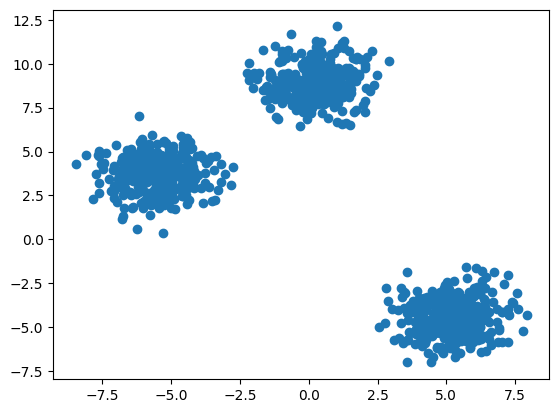

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)
X.shape
plt.scatter(X[:,0],X[:,1])

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=42)

In [4]:
from sklearn.cluster import KMeans

In [6]:
# manual method ie elbow method to select k value
WCSS=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init ='k-means++')
  kmeans.fit(X_train)
  WCSS.append(kmeans.inertia_)

In [7]:
WCSS

[34827.576825520235,
 7935.437286145425,
 1319.2730531585605,
 1140.4677884655134,
 992.632699142929,
 911.1957638365641,
 762.4225166724705,
 672.4753297551251,
 646.1681067181974,
 546.9974349637855]

AttributeError: module 'matplotlib.pyplot' has no attribute 'xlabels'

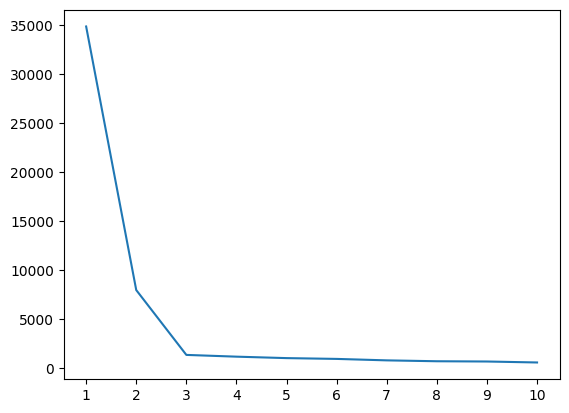

In [8]:
## plot elbow curve
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabels("No. of clusters")
plt.ylabels("WCSS")
plt.show()

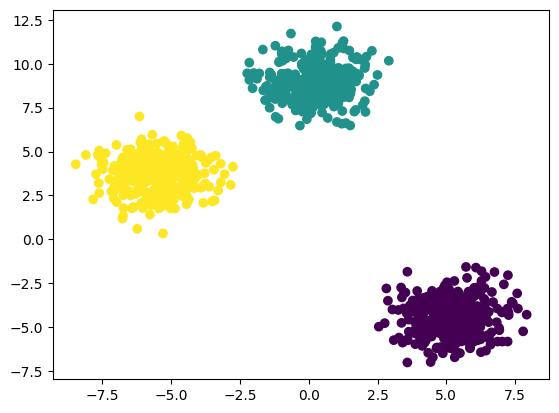

In [10]:
kmeans=KMeans(n_clusters=3,init='k-means++')
y_labels=kmeans.fit_predict(X_train)
y_test_labels=kmeans.predict(X_test)
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_labels)

In [11]:
# automate k value
!pip install kneed
from kneed import KneeLocator
ke=KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')
ke.elbow

np.int64(3)

In [13]:
## performance score           silhoutte score
from sklearn.metrics import silhouette_score
silhouette_coefficients=[]
for k in range (2,11):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans.fit(X_train)
  score=silhouette_score(X_train,kmeans.labels_)
  silhouette_coefficients.append(score)
  silhouette_coefficients

AttributeError: module 'matplotlib.pyplot' has no attribute 'x_labels'

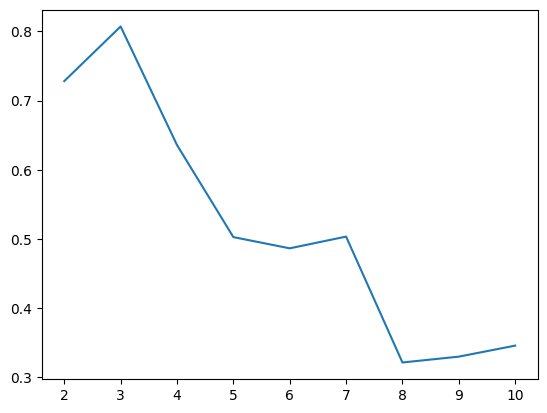

In [15]:
# plot silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.x_labels("No. of clusters")
plt.y_labels("silhoutte coeff")
plt.show()
